### Version 1.0

In [1]:
import csv
from selenium import webdriver
from bs4 import BeautifulSoup
import csv
import requests
import re
import os

driver = webdriver.Chrome()
base_url = 'https://proceedings.neurips.cc'

def extract_bibtex_content(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        bibtex_content = response.text
        return bibtex_content
    else:
        return None
        
def process_bibtex(bibtex_url, paper_info) :
    bibtex_url = base_url + bibtex_url
    bibtex_content = extract_bibtex_content(bibtex_url)

    pattern = r'\s*(.*?)\s*=\s*{(.*)}'
    matches = re.findall(pattern, bibtex_content)

    for key, value in matches:
        if key == 'author': paper_info['Authors'] = value.replace(',', '').replace(' and ', ', ')
        if key == 'booktitle' : paper_info['Book Title'] = value
        if key == 'editor': paper_info['Editors'] = value.replace(' and ', ', ')
        if key == 'pages' : paper_info['Pages'] = value
        if key == 'publisher' : paper_info['Publishers'] = value
        if key == 'title' : paper_info['Title'] = value
        if key == 'volume' : paper_info['Volume'] = value
        if key == 'year' : paper_info['Year'] = value
    return paper_info

def crawl_data(start = 1987, end = 2024):

    header = [
        'Year',
        'Volume',
        'Pages',
        'Status',
        'Book Title',
        'Title',
        'Authors',
        'Editors',
        'Publishers',
        'Main Url',
        'Metadata Url',
        'Paper Url',
        'Supplemental Url',
        'Review Url',
        'MetaReview Url',
        'AuthorFeedback Url',
        'Reviews And Public Comment',
        'Abstract'
    ]

    file_exists = os.path.isfile('papers_data.csv')
    if not file_exists:
        with open('papers_data.csv', mode='a', newline='', encoding='utf-8') as file:
            writer = csv.writer(file)
    
    with open('papers_data.csv', mode='a', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(header)

        ii = 0 
        for year in range(start, end):
            url = f"https://proceedings.neurips.cc/paper/{year}"
            driver.get(url)
            html_content = driver.page_source
            soup = BeautifulSoup(html_content, 'html.parser')

            paper_list_ul = soup.find('ul', class_='paper-list')
            conference_items = paper_list_ul.find_all('li')

            for item in conference_items:
                ii = ii + 1 

                paper_info = {key: None for key in header}

                if("conference" in item.get("class", [])): paper_info['Status'] = 'Main Conference Track'
                elif("datasets_and_benchmarks" in item.get("class", [])) : paper_info['Status'] = 'Datasets and Benchmarks Track'

                # main_url
                paper_info['Main Url'] = base_url + item.a['href'] 

                driver.get(paper_info['Main Url'])
                paper_html_content = driver.page_source
                paper_soup = BeautifulSoup(paper_html_content, 'html.parser')

                abstract_p_tags = paper_soup.select('div.container-fluid > div.col p')
                # Lấy nội dung của các thẻ <p> từ thứ 2 đến cuối cùng
                paper_info['Abstract'] = ' '.join([p_tag.text.strip() for p_tag in abstract_p_tags[2:]])

                div_bibtex_tags = paper_soup.select('div.container-fluid > div.col div')
                div_bibtex_first = div_bibtex_tags[0]
                a_tags = div_bibtex_first.find_all('a')
                for a_tag in a_tags:
                    href = a_tag.get('href')
                    text = a_tag.text
                    if text == 'Bibtex' : paper_info = process_bibtex(href, paper_info)
                    if text == 'Metadata' : paper_info['Metadata Url'] = base_url + href
                    if text == 'Paper' : paper_info['Paper Url'] = base_url + href
                    if text == 'Supplemental' : paper_info['Supplemental Url'] = base_url + href
                    if text == 'Review' : paper_info['Review Url'] = base_url + href # 2020 = Review . others = Reviews 
                    if text == 'Reviews' : paper_info['Review Url'] = base_url + href
                    if text == 'MetaReview' : paper_info['MetaReview Url'] = base_url + href
                    if text == 'AuthorFeedback' : paper_info['AuthorFeedback Url'] = base_url + href
                    if text == 'Reviews And Public Comment »' : paper_info['Reviews And Public Comment Url'] = base_url + href

                print(ii, ' - ', paper_info['Title'])
                writer.writerow([paper_info[key] for key in header])
        driver.quit()
    pass

if __name__ == "__main__":
    crawl_data(2020, 2024)


1  -  A graph similarity for deep learning
2  -  An Unsupervised Information-Theoretic Perceptual Quality Metric
3  -  Self-Supervised MultiModal Versatile Networks
4  -  Benchmarking Deep Inverse Models over time, and the Neural-Adjoint method
5  -  Off-Policy Evaluation and Learning for External Validity under a Covariate Shift
6  -  Neural Methods for Point-wise Dependency Estimation
7  -  Fast and Flexible Temporal Point Processes with Triangular Maps
8  -  Backpropagating Linearly Improves Transferability of Adversarial Examples
9  -  PyGlove: Symbolic Programming for Automated Machine Learning
10  -  Fourier Sparse Leverage Scores and Approximate Kernel Learning
11  -  Improved Algorithms for Online Submodular Maximization via First-order Regret Bounds
12  -  Synbols: Probing Learning Algorithms with Synthetic Datasets
13  -  Adversarially Robust Streaming Algorithms via Differential Privacy
14  -  Trading Personalization for Accuracy: Data Debugging in Collaborative Filtering
15

KeyboardInterrupt: 

+ Status : Main Conference Track   Datasets and Benchmarks Track (xanh) 
+ Main Url : link web 
+ Abstract : tóm tắt 
+ Supplemental Url : link pdf bài báo bổ sung 
+ Authors : tác giả 
+ Book Title : tiêu đề lớn 
+ Editors : người chỉnh sửa 
+ Pages : {184--196}, ??
+ Publishers : nhà xuất bản 
+ Title : tiêu đề bài báo 
+ Original Url : link pdf bài báo gốc 
+ Volume : {36}, ?? cú craw về rồi dùng hay không tính sau 
+ Year : 2023 


2006, 2007 , 2013, 2019 , 2021

+ w = ghi đè 
+ a = ghi tiếp (append)

Year,Volume,Pages,Status,Book Title,Title,Authors,Editors,Publishers,Main Url,Metadata Url,Paper Url,Supplemental Url,Review Url,MetaReview Url,AuthorFeedback Url,Reviews And Public Comment,Abstract


### Version 2.0

#### Crawl Link 

In [2]:
import csv
from selenium import webdriver
from bs4 import BeautifulSoup
import csv
import requests
import re
import os

driver = webdriver.Chrome()
base_url = 'https://proceedings.neurips.cc'

def crawl_link(start = 1987, end = 2024):

    header = [
        'Index',
        'Year',
        'Status',
        'Link Paper',
    ]

    file_exists = os.path.isfile('papers_link.csv')
    if not file_exists:
        with open('papers_link.csv', mode='a', newline='', encoding='utf-8') as file:
            writer = csv.writer(file)
    
    with open('papers_link.csv', mode='a', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(header)

        ii = 0 
        for year in range(start, end):
            url = f"https://proceedings.neurips.cc/paper/{year}"
            driver.get(url)
            html_content = driver.page_source
            soup = BeautifulSoup(html_content, 'html.parser')

            paper_list_ul = soup.find('ul', class_='paper-list')
            conference_items = paper_list_ul.find_all('li')

            for item in conference_items:
                link_info = {key: None for key in header}
                
                if("conference" in item.get("class", [])): link_info['Status'] = 'Main Conference Track'
                elif("datasets_and_benchmarks" in item.get("class", [])) : link_info['Status'] = 'Datasets and Benchmarks Track'
                
                link_info['Index'] = ii
                link_info['Year'] = year
                link_info['Link Paper'] = base_url + item.a['href'] 

                ii = ii + 1 
                print(ii, ' - ', link_info)
                writer.writerow([link_info[key] for key in header])
        driver.quit()
    pass

if __name__ == "__main__":
    crawl_link(1987, 2024)


1  -  {'Index': 0, 'Year': 1987, 'Status': None, 'Link Paper': 'https://proceedings.neurips.cc/paper_files/paper/1987/hash/02e74f10e0327ad868d138f2b4fdd6f0-Abstract.html'}
2  -  {'Index': 1, 'Year': 1987, 'Status': None, 'Link Paper': 'https://proceedings.neurips.cc/paper_files/paper/1987/hash/03afdbd66e7929b125f8597834fa83a4-Abstract.html'}
3  -  {'Index': 2, 'Year': 1987, 'Status': None, 'Link Paper': 'https://proceedings.neurips.cc/paper_files/paper/1987/hash/072b030ba126b2f4b2374f342be9ed44-Abstract.html'}
4  -  {'Index': 3, 'Year': 1987, 'Status': None, 'Link Paper': 'https://proceedings.neurips.cc/paper_files/paper/1987/hash/093f65e080a295f8076b1c5722a46aa2-Abstract.html'}
5  -  {'Index': 4, 'Year': 1987, 'Status': None, 'Link Paper': 'https://proceedings.neurips.cc/paper_files/paper/1987/hash/14bfa6bb14875e45bba028a21ed38046-Abstract.html'}
6  -  {'Index': 5, 'Year': 1987, 'Status': None, 'Link Paper': 'https://proceedings.neurips.cc/paper_files/paper/1987/hash/1679091c5a880faf6

#### Crawl data

In [3]:
import csv
from selenium import webdriver
from bs4 import BeautifulSoup
import csv
import requests
import re
import os

driver = webdriver.Chrome()
base_url = 'https://proceedings.neurips.cc'

def extract_bibtex_content(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        bibtex_content = response.text
        return bibtex_content
    else:
        return None
        
def process_bibtex(bibtex_url, paper_info) :
    bibtex_url = base_url + bibtex_url
    bibtex_content = extract_bibtex_content(bibtex_url)

    pattern = r'\s*(.*?)\s*=\s*{(.*)}'
    matches = re.findall(pattern, bibtex_content)

    for key, value in matches:
        if key == 'author': paper_info['Authors'] = value.replace(',', '').replace(' and ', ', ')
        if key == 'booktitle' : paper_info['Book Title'] = value
        if key == 'editor': paper_info['Editors'] = value.replace(' and ', ', ')
        if key == 'pages' : paper_info['Pages'] = value
        if key == 'publisher' : paper_info['Publishers'] = value
        if key == 'title' : paper_info['Title'] = value
        if key == 'volume' : paper_info['Volume'] = value
        if key == 'year' : paper_info['Year'] = value
    return paper_info

def crawl_data(start_index = 1, end_index = any, paper_links = any):

    header = [
        'Year',
        'Volume',
        'Pages',
        'Status',
        'Book Title',
        'Title',
        'Authors',
        'Editors',
        'Publishers',
        'Main Url',
        'Metadata Url',
        'Paper Url',
        'Supplemental Url',
        'Review Url',
        'MetaReview Url',
        'AuthorFeedback Url',
        'Reviews And Public Comment',
        'Abstract'
    ]

    file_exists = os.path.isfile('papers_data.csv')
    if not file_exists:
        with open('papers_data.csv', mode='a', newline='', encoding='utf-8') as file:
            writer = csv.writer(file)
    
    with open('papers_data.csv', mode='a', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(header)
        for index in range(start_index, end_index):
            paper_info = {key: None for key in header}
            # main_url
            paper_info['Status'] = paper_links[index]['Status']
            paper_info['Main Url'] = paper_links[index]['Link Paper']

            driver.get(paper_info['Main Url'])
            paper_html_content = driver.page_source
            paper_soup = BeautifulSoup(paper_html_content, 'html.parser')

            abstract_p_tags = paper_soup.select('div.container-fluid > div.col p')
            # Lấy nội dung của các thẻ <p> từ thứ 2 đến cuối cùng
            paper_info['Abstract'] = ' '.join([p_tag.text.strip() for p_tag in abstract_p_tags[2:]])

            div_bibtex_tags = paper_soup.select('div.container-fluid > div.col div')
            div_bibtex_first = div_bibtex_tags[0]
            a_tags = div_bibtex_first.find_all('a')
            for a_tag in a_tags:
                href = a_tag.get('href')
                text = a_tag.text
                if text == 'Bibtex' : paper_info = process_bibtex(href, paper_info)
                if text == 'Metadata' : paper_info['Metadata Url'] = base_url + href
                if text == 'Paper' : paper_info['Paper Url'] = base_url + href
                if text == 'Supplemental' : paper_info['Supplemental Url'] = base_url + href
                if text == 'Review' : paper_info['Review Url'] = base_url + href # 2020 = Review . others = Reviews 
                if text == 'Reviews' : paper_info['Review Url'] = base_url + href
                if text == 'MetaReview' : paper_info['MetaReview Url'] = base_url + href
                if text == 'AuthorFeedback' : paper_info['AuthorFeedback Url'] = base_url + href
                if text == 'Reviews And Public Comment »' : paper_info['Reviews And Public Comment Url'] = base_url + href

            print(index, ' - ', paper_info['Title'])
            writer.writerow([paper_info[key] for key in header])
        driver.quit()
    pass
 
if __name__ == "__main__":
    with open('papers_link.csv', newline='') as csvfile:
        paper_links = list(csv.DictReader(csvfile))
        n = len(list(paper_links))
    crawl_data(12453, n - 1, paper_links)

12453  -  Littlestone Classes are Privately Online Learnable
12454  -  Dual Parameterization of Sparse Variational Gaussian Processes
12455  -  Learning to dehaze with polarization
12456  -  Conservative Data Sharing for Multi-Task Offline Reinforcement Learning
12457  -  Universal Rate-Distortion-Perception Representations for Lossy Compression
12458  -  Whatâ€™s a good imputation to predict with missing values?


NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=124.0.6367.119)
Stacktrace:
	GetHandleVerifier [0x00007FF664C51502+60802]
	(No symbol) [0x00007FF664BCAC02]
	(No symbol) [0x00007FF664A87CE4]
	(No symbol) [0x00007FF664A5DFDF]
	(No symbol) [0x00007FF664B01E57]
	(No symbol) [0x00007FF664B198D1]
	(No symbol) [0x00007FF664AFA923]
	(No symbol) [0x00007FF664AC8FEC]
	(No symbol) [0x00007FF664AC9C21]
	GetHandleVerifier [0x00007FF664F5411D+3217821]
	GetHandleVerifier [0x00007FF664F960B7+3488055]
	GetHandleVerifier [0x00007FF664F8F03F+3459263]
	GetHandleVerifier [0x00007FF664D0B846+823494]
	(No symbol) [0x00007FF664BD5F9F]
	(No symbol) [0x00007FF664BD0EC4]
	(No symbol) [0x00007FF664BD1052]
	(No symbol) [0x00007FF664BC18A4]
	BaseThreadInitThunk [0x00007FF9602D7614+20]
	RtlUserThreadStart [0x00007FF9612226A1+33]


In [1]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Đọc dữ liệu từ file CSV
data = pd.read_csv("papers_data.csv")
# data.head(5)

# Tìm các hàng có cột "Abstract" chứa từ "cnn"
# result = data[data['Abstract'].str.contains('cnn', case=False)]
# Tìm các hàng có bất kỳ cột nào chứa từ "cnn"
result = data[data.apply(lambda row: row.astype(str).str.contains('cnn', case=False).any(), axis=1)]

# In kết quả
# print(result)

# Tìm hàng dữ liệu có giá trị cột "Title" là "Federated Learning with Client Subsampling, Data Heterogeneity, and Unbounded Smoothness: A New Algorithm and Lower Bounds"
# result = data[data['Abstract'] == 1987]

# In kết quả
# print(len(result))

# tìm hàng dữ liệu có cột Title = "Federated Learning with Client Subsampling, Data Heterogeneity, and Unbounded Smoothness: A New Algorithm and Lower Bounds" 
# cho tôi 

from wordcloud import WordCloud

# Kết hợp tất cả các từ trong cột "Abstract" thành một chuỗi
text = ' '.join(data['Abstract'].dropna())

# Tạo đám mây từ
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Hiển thị đám mây từ
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


ModuleNotFoundError: No module named 'wordcloud'

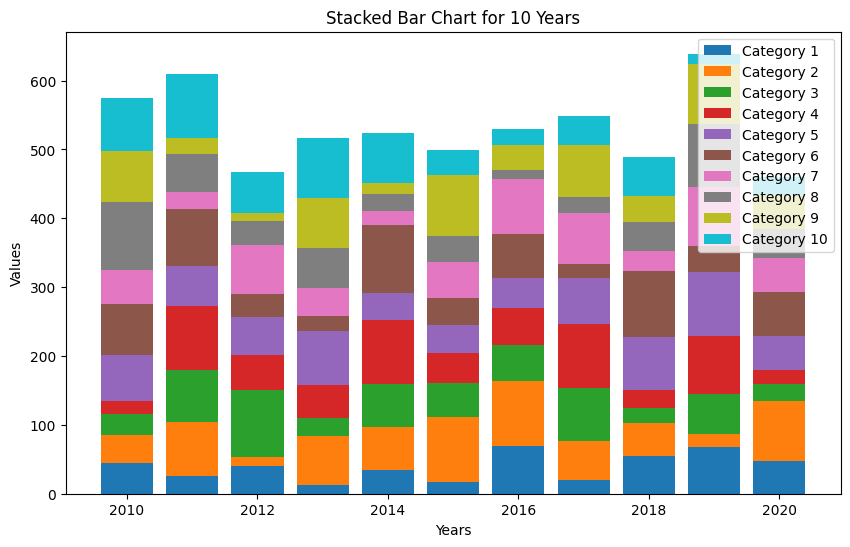

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Tạo dữ liệu giả tạo
years = np.arange(2010, 2021)
data = np.random.randint(10, 100, size=(len(years), 10))

# Vẽ biểu đồ cột chồng
plt.figure(figsize=(10, 6))
plt.bar(years, data[:, 0], label='Category 1')

for i in range(1, data.shape[1]):
    plt.bar(years, data[:, i], bottom=np.sum(data[:, :i], axis=1), label=f'Category {i+1}')

plt.xlabel('Years')
plt.ylabel('Values')
plt.title('Stacked Bar Chart for 10 Years')
plt.legend()

plt.show()


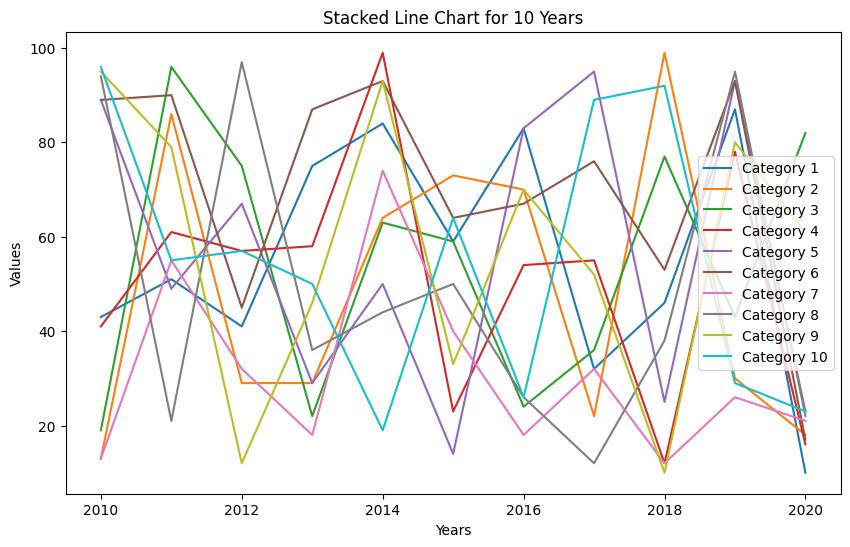

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Tạo dữ liệu giả tạo
years = np.arange(2010, 2021)
data = np.random.randint(10, 100, size=(len(years), 10))

# Vẽ biểu đồ đường
plt.figure(figsize=(10, 6))
for i in range(data.shape[1]):
    plt.plot(years, data[:, i], label=f'Category {i+1}')

plt.xlabel('Years')
plt.ylabel('Values')
plt.title('Stacked Line Chart for 10 Years')
plt.legend()

plt.show()

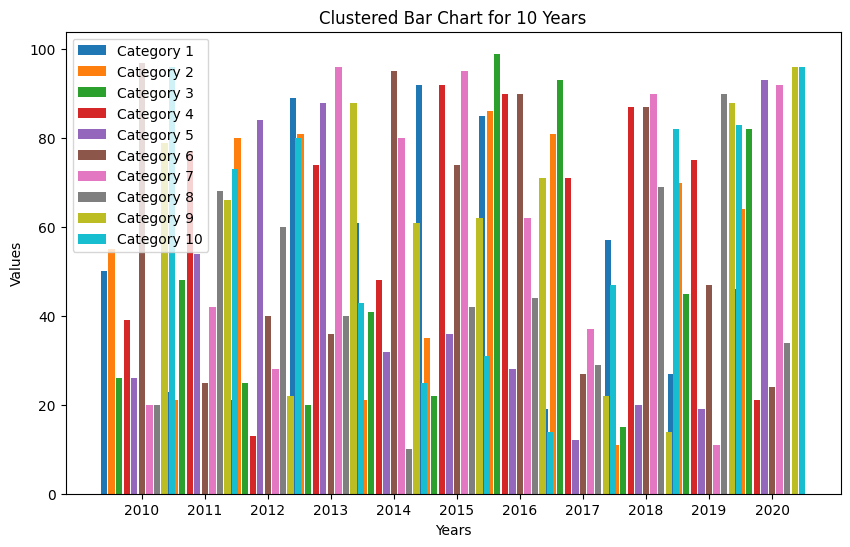

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Tạo dữ liệu giả tạo
years = np.arange(2010, 2021)
data = np.random.randint(10, 100, size=(len(years), 10))

# Tính toán vị trí cho các cột
bar_width = 0.1
space = 0.02
num_categories = data.shape[1]
index = np.arange(len(years))

# Vẽ biểu đồ cột rời
plt.figure(figsize=(10, 6))
for i in range(num_categories):
    plt.bar(index + i * (bar_width + space), data[:, i], bar_width, label=f'Category {i+1}')

plt.xlabel('Years')
plt.ylabel('Values')
plt.title('Clustered Bar Chart for 10 Years')
plt.xticks(index + (num_categories / 2) * (bar_width + space), years)
plt.legend()

plt.show()

In [117]:
import scipy.io

# Đọc tệp imagelabels.mat
data = scipy.io.loadmat('imagelabels.mat')

# Lấy mảng labels từ data
labels_array = data['labels'][0]

# Sắp xếp mảng tăng dần
sorted_labels = sorted(labels_array)

# Lấy các phần tử duy nhất
unique_labels = sorted(set(sorted_labels))

# In độ dài của mảng sau khi đã lấy các phần tử duy nhất
print(len(unique_labels))
print(unique_labels)



102
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102]


In [ ]:

# https://www.kaggle.com/code/hobaak/flowerdetector-oxford-102-flowers/notebook
# flower_df = pd.read_csv('/kaggle/input/oxford-102-flower-name-index/oxford_flower_102_name.csv', header=0)
flower_index_dict = {0: 'pink primrose', 1: 'hard-leaved pocket orchid', 2: 'canterbury bells', 3: 'sweet pea', 4: 'english marigold', 5: 'tiger lily', 6: 'moon orchid', 7: 'bird of paradise', 8: 'monkshood', 9: 'globe thistle', 10: 'snapdragon', 11: "colt's foot", 12: 'king protea', 13: 'spear thistle', 14: 'yellow iris', 15: 'globe-flower', 16: 'purple coneflower', 17: 'peruvian lily', 18: 'balloon flower', 19: 'giant white arum lily', 20: 'fire lily', 21: 'pincushion flower', 22: 'fritillary', 23: 'red ginger', 24: 'grape hyacinth', 25: 'corn poppy', 26: 'prince of wales feathers', 27: 'stemless gentian', 28: 'artichoke', 29: 'sweet william', 30: 'carnation', 31: 'garden phlox', 32: 'love in the mist', 33: 'mexican aster', 34: 'alpine sea holly', 35: 'ruby-lipped cattleya', 36: 'cape flower', 37: 'great masterwort', 38: 'siam tulip', 39: 'lenten rose', 40: 'barbeton daisy', 41: 'daffodil', 42: 'sword lily', 43: 'poinsettia', 44: 'bolero deep blue', 45: 'wallflower', 46: 'marigold', 47: 'buttercup', 48: 'oxeye daisy', 49: 'common dandelion', 50: 'petunia', 51: 'wild pansy', 52: 'primula', 53: 'sunflower', 54: 'pelargonium', 55: 'bishop of llandaff', 56: 'gaura', 57: 'geranium', 58: 'orange dahlia', 59: 'pink-yellow dahlia', 60: 'cautleya spicata', 61: 'japanese anemone', 62: 'black-eyed susan', 63: 'silverbush', 64: 'californian poppy', 65: 'osteospermum', 66: 'spring crocus', 67: 'bearded iris', 68: 'windflower', 69: 'tree poppy', 70: 'gazania', 71: 'azalea', 72: 'water lily', 73: 'rose', 74: 'thorn apple', 75: 'morning glory', 76: 'passion flower', 77: 'lotus lotus', 78: 'toad lily', 79: 'anthurium', 80: 'frangipani', 81: 'clematis', 82: 'hibiscus', 83: 'columbine', 84: 'desert-rose', 85: 'tree mallow', 86: 'magnolia', 87: 'cyclamen', 88: 'watercress', 89: 'canna lily', 90: 'hippeastrum', 91: 'bee balm', 92: 'ball moss', 93: 'foxglove', 94: 'bougainvillea', 95: 'camellia', 96: 'mallow', 97: 'mexican petunia', 98: 'bromelia', 99: 'blanket flower', 100: 'trumpet creeper', 101: 'blackberry lily'}
# flower_index_dict_plus_one = {key + 1: value for key, value in flower_index_dict.items()}
print(flower_index_dict)

In [25]:
from keras.models import load_model
loaded_model = load_model('./final_best_gglenet_model.h5')

In [28]:
import scipy.io
data = scipy.io.loadmat('imagelabels.mat')
labels_array = data['labels'][0]
print(labels_array)
print(len(labels_array))

[77 77 77 ... 62 62 62]
8189


In [29]:
# Khởi tạo mảng mới để chứa nhãn dưới dạng tên
labels_name_array = []

# Chuyển đổi mã nhãn thành tên tương ứng và thêm vào mảng
for label in labels_array:
    label_name = flower_index_dict.get(label, 'Unknown')  # Lấy tên tương ứng từ dictionary
    labels_name_array.append(label_name)

# In ra mảng nhãn dưới dạng tên
print(labels_name_array)

['passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion flower', 'passion 

Gom ảnh thành các folder lable name flowers

In [30]:
# import os
# import shutil

# # Đường dẫn tới thư mục chứa ảnh
# image_folder = "./102flowers/jpg"

# # Lặp qua danh sách các tệp ảnh
# for filename in os.listdir(image_folder):
#     # Đường dẫn đầy đủ đến tệp ảnh
#     filepath = os.path.join(image_folder, filename)
    
#     # Lấy số thứ tự của ảnh từ tên tệp
#     image_number = int(filename.split('_')[1].split('.')[0])
    
#     # Lấy nhãn tương ứng từ labels_name_array
#     label_name = labels_name_array[image_number - 1]  # Trừ 1 vì index bắt đầu từ 0
    
#     # Tạo thư mục cho nhãn nếu thư mục chưa tồn tại
#     label_folder = os.path.join(image_folder, label_name)
#     if not os.path.exists(label_folder):
#         os.makedirs(label_folder)
    
#     # Di chuyển tệp ảnh vào thư mục nhãn tương ứng
#     shutil.move(filepath, os.path.join(label_folder, filename))

# print("Done!")


Done!


In [111]:
# Label training array
training_labels = ['48', '76', '42', '72', '89', '73', '81', '95', '88', '77', '37', '39', '83', '96', '74']

# Tạo một danh sách chứa tên nhãn tương ứng
label_names = [flower_index_dict[int(label)] for label in training_labels]

# In ra danh sách tên nhãn
print(label_names)


['buttercup', 'morning glory', 'daffodil', 'azalea', 'watercress', 'water lily', 'frangipani', 'bougainvillea', 'cyclamen', 'passion flower', 'cape flower', 'siam tulip', 'hibiscus', 'camellia', 'rose']


In [32]:
# # Label training array
# training_labels = ['76', '72', '88', '73', '81', '77', '74', '42', '83', '89', '39', '37', '48', '95', '96']
# # Dictionary chứa tên nhãn tương ứng với key

# # Tạo một dictionary chứa cặp key và value tương ứng
# label_key_value = {int(label): flower_index_dict[int(label)] for label in training_labels}

# # In ra dictionary vừa tạo
# print(label_key_value)


{76: 'morning glory', 72: 'azalea', 88: 'cyclamen', 73: 'water lily', 81: 'frangipani', 77: 'passion flower', 74: 'rose', 42: 'daffodil', 83: 'hibiscus', 89: 'watercress', 39: 'siam tulip', 37: 'cape flower', 48: 'buttercup', 95: 'bougainvillea', 96: 'camellia'}


In [120]:
flower_index_dict = {0: 'pink primrose', 1: 'hard-leaved pocket orchid', 2: 'canterbury bells', 3: 'sweet pea', 4: 'english marigold', 5: 'tiger lily', 6: 'moon orchid', 7: 'bird of paradise', 8: 'monkshood', 9: 'globe thistle', 10: 'snapdragon', 11: "colt's foot", 12: 'king protea', 13: 'spear thistle', 14: 'yellow iris', 15: 'globe-flower', 16: 'purple coneflower', 17: 'peruvian lily', 18: 'balloon flower', 19: 'giant white arum lily', 20: 'fire lily', 21: 'pincushion flower', 22: 'fritillary', 23: 'red ginger', 24: 'grape hyacinth', 25: 'corn poppy', 26: 'prince of wales feathers', 27: 'stemless gentian', 28: 'artichoke', 29: 'sweet william', 30: 'carnation', 31: 'garden phlox', 32: 'love in the mist', 33: 'mexican aster', 34: 'alpine sea holly', 35: 'ruby-lipped cattleya', 36: 'cape flower', 37: 'great masterwort', 38: 'siam tulip', 39: 'lenten rose', 40: 'barbeton daisy', 41: 'daffodil', 42: 'sword lily', 43: 'poinsettia', 44: 'bolero deep blue', 45: 'wallflower', 46: 'marigold', 47: 'buttercup', 48: 'oxeye daisy', 49: 'common dandelion', 50: 'petunia', 51: 'wild pansy', 52: 'primula', 53: 'sunflower', 54: 'pelargonium', 55: 'bishop of llandaff', 56: 'gaura', 57: 'geranium', 58: 'orange dahlia', 59: 'pink-yellow dahlia', 60: 'cautleya spicata', 61: 'japanese anemone', 62: 'black-eyed susan', 63: 'silverbush', 64: 'californian poppy', 65: 'osteospermum', 66: 'spring crocus', 67: 'bearded iris', 68: 'windflower', 69: 'tree poppy', 70: 'gazania', 71: 'azalea', 72: 'water lily', 73: 'rose', 74: 'thorn apple', 75: 'morning glory', 76: 'passion flower', 77: 'lotus lotus', 78: 'toad lily', 79: 'anthurium', 80: 'frangipani', 81: 'clematis', 82: 'hibiscus', 83: 'columbine', 84: 'desert-rose', 85: 'tree mallow', 86: 'magnolia', 87: 'cyclamen', 88: 'watercress', 89: 'canna lily', 90: 'hippeastrum', 91: 'bee balm', 92: 'ball moss', 93: 'foxglove', 94: 'bougainvillea', 95: 'camellia', 96: 'mallow', 97: 'mexican petunia', 98: 'bromelia', 99: 'blanket flower', 100: 'trumpet creeper', 101: 'blackberry lily'}

given_keys = {'37': 0, '39': 1, '42': 2, '48': 3, '72': 4, '73': 5, '74': 6, '76': 7, '77': 8, '81': 9, '83': 10, '88': 11, '89': 12, '95': 13, '96': 14}

new_dict = {}
for key, value in given_keys.items():
    new_dict[key] = flower_index_dict[int(key)]

print(new_dict)

{'37': 'great masterwort', '39': 'lenten rose', '42': 'sword lily', '48': 'oxeye daisy', '72': 'water lily', '73': 'rose', '74': 'thorn apple', '76': 'passion flower', '77': 'lotus lotus', '81': 'clematis', '83': 'columbine', '88': 'watercress', '89': 'canna lily', '95': 'camellia', '96': 'mallow'}


In [191]:
# import os

# # Đường dẫn tới thư mục chứa các folder
# folder_path = "102flowers\jpg"

# # Lặp qua tất cả các folder trong thư mục
# for folder_name in os.listdir(folder_path):
#     # Kiểm tra nếu folder có chứa dấu cách
#     if '-' in folder_name:
#         # Tạo tên mới bằng cách thay thế dấu cách bằng dấu gạch ngang
#         new_folder_name = folder_name.replace('-', '_')
#         # Tạo đường dẫn mới cho folder
#         old_folder_path = os.path.join(folder_path, folder_name)
#         new_folder_path = os.path.join(folder_path, new_folder_name)
#         # Rename folder
#         os.rename(old_folder_path, new_folder_path)
#         print(f"Đã đổi tên '{folder_name}' thành '{new_folder_name}'")


Đã đổi tên 'alpine-sea-holly' thành 'alpine_sea_holly'
Đã đổi tên 'ball-moss' thành 'ball_moss'
Đã đổi tên 'balloon-flower' thành 'balloon_flower'
Đã đổi tên 'barbeton-daisy' thành 'barbeton_daisy'
Đã đổi tên 'bearded-iris' thành 'bearded_iris'
Đã đổi tên 'bee-balm' thành 'bee_balm'
Đã đổi tên 'bird-of-paradise' thành 'bird_of_paradise'
Đã đổi tên 'bishop-of-llandaff' thành 'bishop_of_llandaff'
Đã đổi tên 'black-eyed-susan' thành 'black_eyed_susan'
Đã đổi tên 'blackberry-lily' thành 'blackberry_lily'
Đã đổi tên 'blanket-flower' thành 'blanket_flower'
Đã đổi tên 'bolero-deep-blue' thành 'bolero_deep_blue'
Đã đổi tên 'californian-poppy' thành 'californian_poppy'
Đã đổi tên 'canna-lily' thành 'canna_lily'
Đã đổi tên 'canterbury-bells' thành 'canterbury_bells'
Đã đổi tên 'cape-flower' thành 'cape_flower'
Đã đổi tên 'cautleya-spicata' thành 'cautleya_spicata'
Đã đổi tên 'colt's-foot' thành 'colt's_foot'
Đã đổi tên 'common-dandelion' thành 'common_dandelion'
Đã đổi tên 'corn-poppy' thành 'co

In [241]:
import os
import shutil

flower_index_dict = {'37': 'great_masterwort', '39': 'lenten_rose', '42': 'sword_lily', '48': 'oxeye_daisy', '72': 'water_lily', '73': 'rose', '74': 'thorn_apple', '76': 'passion_flower', '77': 'lotus_lotus', '81': 'clematis', '83': 'columbine', '88': 'watercress', '89': 'canna_lily', '95': 'camellia', '96': 'mallow'}

folder_path = "./102flowers/jpg/"

# Lấy danh sách các folder có trong folder_path
folders = os.listdir(folder_path)

# Lặp qua các folder và kiểm tra nếu tên folder không có trong flower_index_dict thì xóa
for folder in folders:
    if folder not in flower_index_dict.values():
        folder_to_delete = os.path.join(folder_path, folder)
        shutil.rmtree(folder_to_delete)

print("Các thư mục không nằm trong flower_index_dict đã được xóa thành công!")

Các thư mục không nằm trong flower_index_dict đã được xóa thành công!


In [205]:
flower_index_dict = {'37': 'great_masterwort', '39': 'lenten_rose', '42': 'sword_lily', '48': 'oxeye_daisy', '72': 'water_lily', '73': 'rose', '74': 'thorn_apple', '76': 'passion_flower', '77': 'lotus_lotus', '81': 'clematis', '83': 'columbine', '88': 'watercress', '89': 'canna_lily', '95': 'camellia', '96': 'mallow'}

folder_path = "./102flowers/jpg/"

# Tạo mảng các đường dẫn thư mục từ giá trị trong từ điển flower_index_dict
folder_paths = [folder_path + flower_name.replace('_', ' ') for flower_name in flower_index_dict.values()]

print(folder_paths)


['./102flowers/jpg/great masterwort', './102flowers/jpg/lenten rose', './102flowers/jpg/sword lily', './102flowers/jpg/oxeye daisy', './102flowers/jpg/water lily', './102flowers/jpg/rose', './102flowers/jpg/thorn apple', './102flowers/jpg/passion flower', './102flowers/jpg/lotus lotus', './102flowers/jpg/clematis', './102flowers/jpg/columbine', './102flowers/jpg/watercress', './102flowers/jpg/canna lily', './102flowers/jpg/camellia', './102flowers/jpg/mallow']


In [276]:
# !pip install -q efficientnet
# !pip install -U efficientnet==0.0.4
# !pip install -U git+https://github.com/qubvel/efficientnet
# import efficientnet.tfkeras as efn
# import efficientnet.tfkeras
# from tensorflow.keras.models import load_model
import efficientnet.tfkeras as efn
import os
import cv2
import numpy as np
from keras.models import load_model
import tensorflow.keras.models as M
import tensorflow.keras.layers as L
import tensorflow.keras.backend as K
import tensorflow.keras.callbacks as C

from tensorflow.keras.applications import EfficientNetB6
from tensorflow.keras.models import load_model

base_model = efn.EfficientNetB6(
    weights = 'imagenet',
    include_top = False,
    input_shape = (250, 250, 3)
)

model = M.Sequential()
model.add(base_model)
model.add(L.GlobalAveragePooling2D())
model.add(L.Dense(15, activation = 'softmax'))
model.load_weights('./weights_EfficientNet_model_step3.hdf5')

# create EfficientNetB0 model
# model = EfficientNetB6(weights='imagenet', include_top=False)  
# model.save_weights('noisy_student_efficientnet_b0.hdf5')


# model = load_model('./EfficientNet_model_step2.h5')
# how to load model efficientnet
# https://pypi.org/project/efficientnet/

def preprocess_image(img_path):
    img = cv2.imread(img_path)  # Đọc ảnh từ đường dẫn
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Chuyển đổi không gian màu từ BGR sang RGB
    img = cv2.resize(img, (224, 224))  # Thay đổi kích thước ảnh thành kích thước mà mô hình yêu cầu
    img = img / 255.0  # Chuẩn hóa pixel thành khoảng [0, 1]
    return img


# Load model đã được lưu trữ
# loaded_model = load_model('./final_best_gglenet_model.h5')
# loaded_model = load_model('./EfficientNet_model_step2.h5')

# Đường dẫn tới thư mục chứa các thư mục nhãn và ảnh
image_folder = "./102flowers/jpg" 

# Dictionary ánh xạ từ số nhãn sang tên loài hoa
flower_index_dict = {'37': 'great_masterwort', '39': 'lenten_rose', '42': 'sword_lily', '48': 'oxeye_daisy', '72': 'water_lily', '73': 'rose', '74': 'thorn_apple', '76': 'passion_flower', '77': 'lotus_lotus', '81': 'clematis', '83': 'columbine', '88': 'watercress', '89': 'canna_lily', '95': 'camellia', '96': 'mallow'}
# {'37': 0, '39': 1, '42': 2, '48': 3, '72': 4, '73': 5, '74': 6, '76': 7, '77': 8, '81': 9, '83': 10, '88': 11, '89': 12, '95': 13, '96': 14}

# flower_names = list(flower_index_dict.values())

# # Khởi tạo danh sách để lưu trữ ảnh và nhãn tương ứng
# labels = []
# images = []

# for index, label_name in enumerate(flower_names):
#     folder_path = image_folder +"/"+ label_name
#     # Duyệt qua từng tệp ảnh trong thư mục nhãn và thêm chúng vào danh sách
#     for img_name in os.listdir(folder_path):
#         img_path = os.path.join(folder_path, img_name)
#         image = preprocess_image(img_path)
#         images.append(image)
#         labels.append(index)

# images = np.array(images)
# predicts_label = loaded_model.predict(images)

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/qubvel/efficientnet to c:\users\admin\appdata\local\temp\pip-req-build-vxvz8v2g
  Resolved https://github.com/qubvel/efficientnet to commit f7f3e736c113b872caf53dae9fbbda996a8eb87d
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for efficientnet: filename=efficientnet-1.1.1-py3-none-any.whl size=18449 sha256=ea09145a079b13022a0bccfd5279bfb7ec8a99372ee9aa5cd34c7126055140ed
  Stored in directory: C:\Users\ADMIN\AppData\Local\Temp\pip-ephem-wheel-cache-lte14ekw\wheels\82\56\f5\e478b7a9f991eb87193c395cdb36b032f6501dd48d43532530
Successfully built efficientnet
  Attempting uninstall: efficientnet
    Found existing installation: efficientnet 0.0.4
    Uninstalling efficientnet-0.0.4:
      Successfully uninstalled efficientnet-0.0.4


  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/efficientnet 'C:\Users\ADMIN\AppData\Local\Temp\pip-req-build-vxvz8v2g'


ModuleNotFoundError: No module named 'efficientnet'

In [235]:
print(flower_names)

['great_masterwort', 'lenten_rose', 'sword_lily', 'oxeye_daisy', 'water_lily', 'rose', 'thorn_apple', 'passion_flower', 'lotus_lotus', 'clematis', 'columbine', 'watercress', 'canna_lily', 'camellia', 'mallow']


In [231]:
predicts_label = np.argmax(predicts_label, axis=1)
print(predicts_label)

[ 7  0  0 ...  2 14 14]


In [232]:
labels = np.array(labels)
predicts_label = np.array(predicts_label)
print(labels)
print(predicts_label)
print(labels.shape)
print(predicts_label.shape)

[ 0  0  0 ... 14 14 14]
[ 7  0  0 ...  2 14 14]
(1796,)
(1796,)


In [233]:
#Warnings
import warnings
warnings.filterwarnings('ignore')

# Đánh giá model trên tập dữ liệu
from sklearn.metrics import classification_report, confusion_matrix
report = classification_report(labels, predicts_label, output_dict=True)
# print(report)
# In chỉ số f1, precision, recall
print("F1:", report['weighted avg']['f1-score'])
print("Precision:", report['weighted avg']['precision'])
print("Recall:", report['weighted avg']['recall'])

F1: 0.9470828580269306
Precision: 0.9480222797997422
Recall: 0.9471046770601337


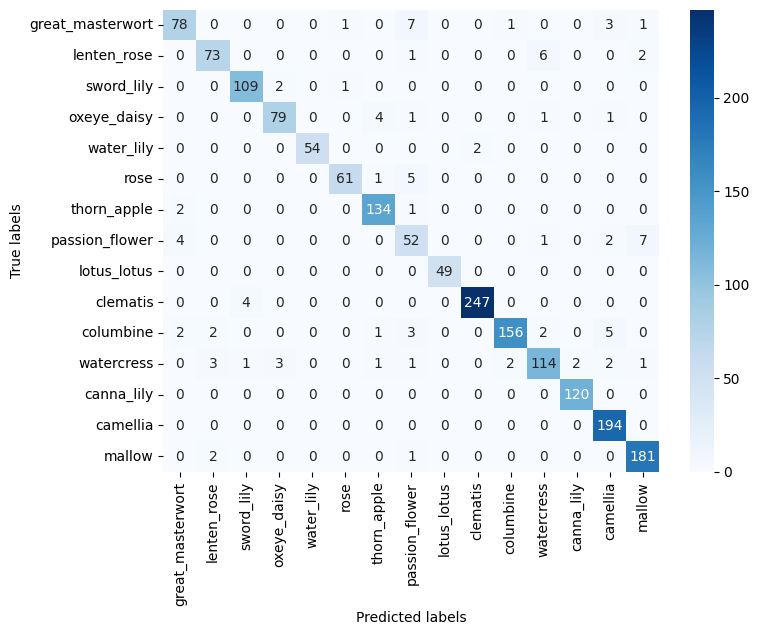

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

# Assume you already have the confusion matrix (cm), sorted confusion matrix (sorted_cm), DataFrame (df_cm),
# true labels (true_labels), predicted labels (preds), and classes defined

# Tạo ma trận nhầm lẫn
cm = confusion_matrix(labels, predicts_label)

# Sắp xếp lại ma trận nhầm lẫn
sorted_cm = cm[np.argsort(flower_names)][:, np.argsort(flower_names)]

# Tạo dataframe từ ma trận nhầm lẫn đã sắp xếp lại
df_cm = pd.DataFrame(sorted_cm, index=flower_names, columns=flower_names)

# Set font size
font_size = 10

# Vẽ ma trận nhầm lẫn với font size đã điều chỉnh
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g', annot_kws={"size": font_size})
plt.xlabel('Predicted labels', fontsize=font_size)
plt.ylabel('True labels', fontsize=font_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.show()
